In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (accuracy_score, confusion_matrix,
                            classification_report, roc_auc_score)
from google.colab import files  # For file uploads
import io
from sklearn.preprocessing import StandardScaler

In [2]:
# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [5]:
# Upload  data
print("Please upload your dataset file:")
uploaded = files.upload()
file_name = next(iter(uploaded))
# Read the uploaded file into a pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

Please upload your dataset file:


Saving cleaned_driver_physiology.csv to cleaned_driver_physiology (1).csv


In [6]:
# Exploratory Data Analysis
print("=== Dataset Overview ===")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nBasic Statistics:")
print(df.describe())


=== Dataset Overview ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Body_Temperature  1224 non-null   float64
 1   Heart_Rate        1224 non-null   int64  
 2   SPO2              1224 non-null   int64  
 3   Driver_State      1224 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 38.4 KB
None

First 5 rows:
   Body_Temperature  Heart_Rate  SPO2  Driver_State
0             95.50          54    85             5
1             95.90          54    85             5
2             96.10          54    85             5
3            100.22          54    99             5
4            100.10          54    79             7

Basic Statistics:
       Body_Temperature   Heart_Rate         SPO2  Driver_State
count       1224.000000  1224.000000  1224.000000   1224.000000
mean          99.424338    74.310458    80.053105      6.

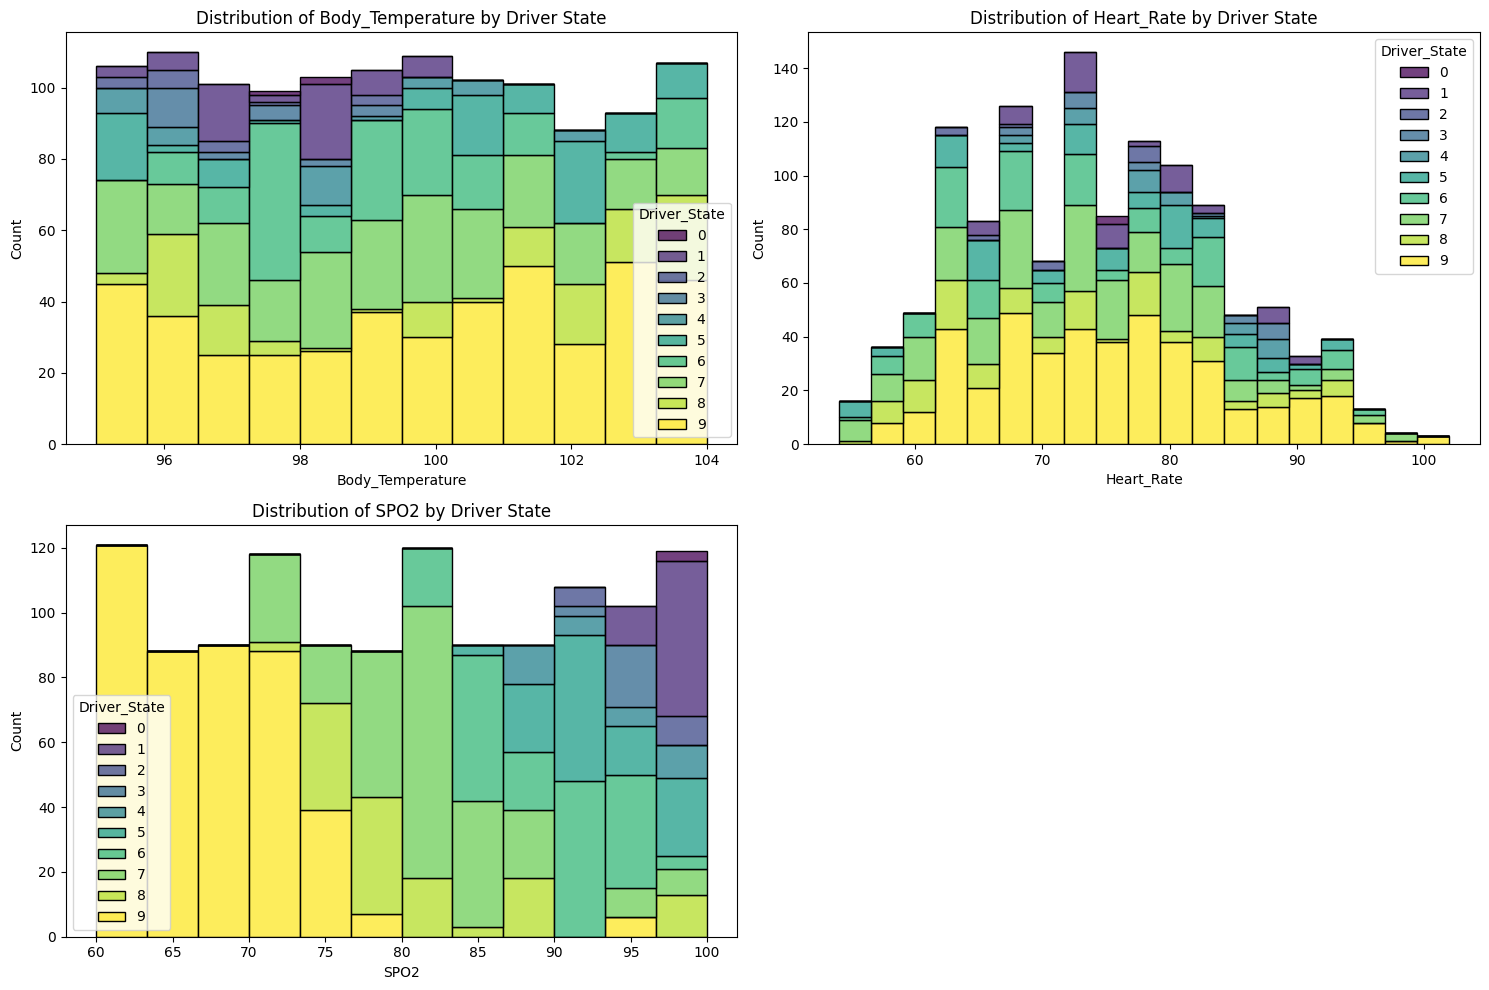

In [8]:
# Visualize the data distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=df, x=col, hue='Driver_State', multiple='stack', palette='viridis')
    plt.title(f'Distribution of {col} by Driver State')
plt.tight_layout()
plt.show()

In [9]:
# Prepare data for modeling
X = df.drop('Driver_State', axis=1)
y = df['Driver_State']

In [10]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, multi_class='ovr'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}


=== Training Logistic Regression ===


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.


Logistic Regression Performance:
Accuracy: 0.6082
Cross-validation: 0.5925 ± 0.0402

Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.33      0.44        12
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.52      0.55      0.53        22
           6       0.40      0.29      0.34        34
           7       0.43      0.70      0.53        50
           8       0.00      0.00      0.00        25
           9       0.81      1.00      0.90        88

    accuracy                           0.61       245
   macro avg       0.31      0.32      0.31       245
weighted avg       0.51      0.61      0.55       245



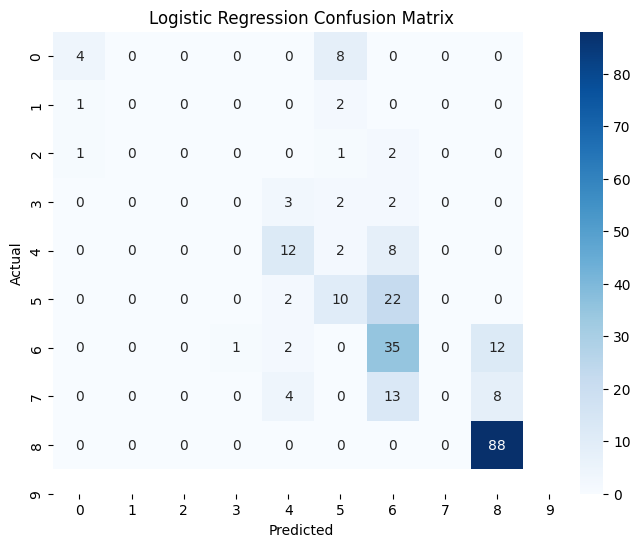


=== Training Random Forest ===


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(



Random Forest Performance:
Accuracy: 0.9469
Cross-validation: 0.9264 ± 0.0160

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      0.67      0.80         3
           3       1.00      0.75      0.86         4
           4       1.00      0.71      0.83         7
           5       0.90      0.82      0.86        22
           6       0.89      1.00      0.94        34
           7       0.94      0.92      0.93        50
           8       0.96      0.96      0.96        25
           9       0.97      1.00      0.98        88

    accuracy                           0.95       245
   macro avg       0.96      0.87      0.91       245
weighted avg       0.95      0.95      0.95       245



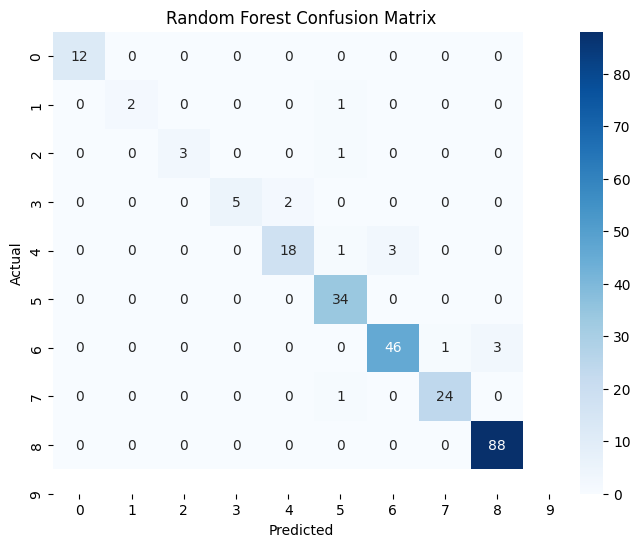

In [17]:
# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\n=== Training {name} ===")

    # Train model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix,
        'classification_report': class_report,
        'cv_mean': np.mean(cv_scores),
        'cv_std': np.std(cv_scores)
    }

    # Print results
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Cross-validation: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
    print("\nClassification Report:")
    print(class_report)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [21]:
# Compare model performances
print("\n=== Model Comparison ===")
for name, result in results.items():
    print(f"{name}:")
    print(f"Test Accuracy: {result['accuracy']:.4f}")
    print(f"CV Accuracy: {result['cv_mean']:.4f} ± {result['cv_std']:.4f}\n")

# Save the best model
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
joblib.dump(best_model, 'best_driver_state_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print(f"\nSaved best model ({best_model_name}) and scaler to disk.")



=== Model Comparison ===
Logistic Regression:
Test Accuracy: 0.6082
CV Accuracy: 0.5925 ± 0.0402

Random Forest:
Test Accuracy: 0.9469
CV Accuracy: 0.9264 ± 0.0160


Saved best model (Random Forest) and scaler to disk.


In [22]:
def predict_driver_state(model, scaler, temp, heart_rate, spo2):
    """Predict driver state from physiological data"""
    input_data = np.array([[temp, heart_rate, spo2]])
    scaled_data = scaler.transform(input_data)
    prediction = model.predict(scaled_data)
    probabilities = model.predict_proba(scaled_data)[0]

    print(f"\nPredicted Driver State: {prediction[0]}")
    print("Prediction Probabilities:")
    for state, prob in enumerate(probabilities):
        print(f"State {state}: {prob:.4f}")

    return prediction[0]

# E.g usage
print("\n=== Example Prediction ===")
predict_driver_state(best_model, scaler, temp=98.6, heart_rate=72, spo2=85)


=== Example Prediction ===

Predicted Driver State: 4
Prediction Probabilities:
State 0: 0.0000
State 1: 0.0100
State 2: 0.0000
State 3: 0.0000
State 4: 0.4400
State 5: 0.0000
State 6: 0.4300
State 7: 0.1200
State 8: 0.0000
State 9: 0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.int64(4)

In [20]:
import joblib